In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

In [2]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading the train.xlsx file

df_train = pd.read_excel('/content/drive/MyDrive/hackprac/Train.xlsx')
df_train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [4]:
#reading test.xlsx file

test_df = pd.read_excel('/content/drive/MyDrive/hackprac/Test.xlsx')
test_df.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [5]:
#number of elements with the specified value in train

df_train.count()

CustomerID            23820
RetentionPotential    23820
dtype: int64

In [6]:
#number of elements with the specified value in test

test_df.count()

CustomerID    5955
dtype: int64

In [7]:
#getting info of the train data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          23820 non-null  object
 1   RetentionPotential  23820 non-null  object
dtypes: object(2)
memory usage: 372.3+ KB


In [8]:
#getting info of the test data

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5955 non-null   object
dtypes: object(1)
memory usage: 46.6+ KB


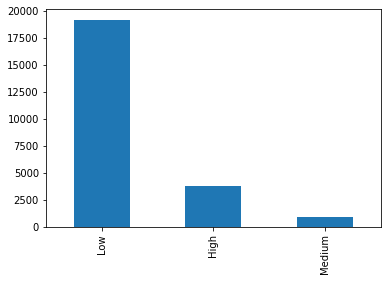

In [9]:
#plotting the value_count of retention potential

df_train["RetentionPotential"].value_counts().plot(kind = 'bar')
plt.show()

In [10]:
#reading the Customer train data 

df_cust = pd.read_excel('/content/drive/MyDrive/hackprac/Customerdata_Train.xlsx')
df_cust.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [11]:
#getting the columns 

df_cust.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [12]:
#recording the info 

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [13]:
#reading the customer test data

test_cust = pd.read_excel('/content/drive/MyDrive/hackprac/Customerdata_Test.xlsx')
test_cust.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [14]:
#getting the customer test info

test_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   object        
 1   City                  5955 non-null   object        
 2   DateOfRegistration    5955 non-null   datetime64[ns]
 3   OnlineCommunication   5955 non-null   int64         
 4   AutomaticRefill       5955 non-null   int64         
 5   DoorstepDelivery      5955 non-null   int64         
 6   PreferredDeliveryDay  5955 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 325.8+ KB


In [15]:
#reading the email train data

df_email = pd.read_excel('/content/drive/MyDrive/hackprac/Emaildata_Train.xlsx')
df_email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [16]:
#getting the info of email train data

df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517672 entries, 0 to 517671
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   517672 non-null  object
 1   DateOfemail  517672 non-null  object
 2   EmailType    517672 non-null  object
 3   timestamp    517672 non-null  object
 4   MailOpened   517672 non-null  object
 5   MailClicked  517672 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [17]:
#reading the email test data

test_email = pd.read_excel('/content/drive/MyDrive/hackprac/Emaildata_Test.xlsx')
test_email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [18]:
#getting the info of email test data

test_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129074 entries, 0 to 129073
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   129074 non-null  object
 1   DateOfemail  129074 non-null  object
 2   EmailType    129074 non-null  object
 3   timestamp    129074 non-null  object
 4   MailOpened   129074 non-null  object
 5   MailClicked  129074 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [19]:
#reading the transcations train data

df_trans = pd.read_excel('/content/drive/MyDrive/hackprac/transactionsdata_Train.xlsx')
df_trans.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [20]:
#reading the transactions test data

test_tran = pd.read_excel('/content/drive/MyDrive/hackprac/transactionsdata_Test.xlsx')
test_tran.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [21]:
#getting the info of the transactions test data

test_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     26768 non-null  object
 1   DateOfOrder    26768 non-null  object
 2   timestamp      26768 non-null  object
 3   OrderQuantity  26768 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 836.6+ KB


In [22]:
#getting the info of df_trans data

df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [23]:
#merging data of all the train datasets

dfs = [df_train, df_cust, df_email, df_trans]

df_final = reduce(lambda left,right: pd.merge(left,right,on='CustomerID'), dfs)

In [24]:
df_final.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity
0,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2011-07-27,15:01:26,119
1,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2013-05-22,16:05:08,111
2,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2012-06-16,16:24:50,128
3,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2013-05-06,12:13:08,120
4,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2012-04-02,15:08:44,110


In [25]:
#defining length of the data

len(df_final)

3883469

In [26]:
#defining the count of the data

df_final.count()

CustomerID              3883469
RetentionPotential      3883469
City                    3883469
DateOfRegistration      3883469
OnlineCommunication     3883469
AutomaticRefill         3883469
DoorstepDelivery        3883469
PreferredDeliveryDay    3883469
DateOfemail             3883469
EmailType               3883469
timestamp_x             3883469
MailOpened              3883469
MailClicked             3883469
DateOfOrder             3883469
timestamp_y             3883469
OrderQuantity           3883469
dtype: int64

In [27]:
#merging data of all the test datasets

dfs1 = [test_df, test_cust, test_email, test_tran]

test_df_final = reduce(lambda left,right: pd.merge(left,right,on='CustomerID'), dfs1)

In [28]:
#getting the data count after merging

test_df_final.count()

CustomerID              1013740
City                    1013740
DateOfRegistration      1013740
OnlineCommunication     1013740
AutomaticRefill         1013740
DoorstepDelivery        1013740
PreferredDeliveryDay    1013740
DateOfemail             1013740
EmailType               1013740
timestamp_x             1013740
MailOpened              1013740
MailClicked             1013740
DateOfOrder             1013740
timestamp_y             1013740
OrderQuantity           1013740
dtype: int64

In [29]:
df_final = df_final.drop_duplicates()

In [30]:
test_df_final = test_df_final.drop_duplicates()

In [31]:
test_df_final.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity
0,C12121,CITY1,2017-12-04,1,0,0,Friday,2017-12-04,WelcomeEmail,16:00:36,yes,NotApplicable,2017-12-14,11:38:00,52
1,C12121,CITY1,2017-12-04,1,0,0,Friday,2017-12-13,CustomizedEmail,10:51:08,yes,no,2017-12-14,11:38:00,52
2,C12121,CITY1,2017-12-04,1,0,0,Friday,2017-12-13,CustomizedEmail,15:27:46,no,no,2017-12-14,11:38:00,52
3,C12121,CITY1,2017-12-04,1,0,0,Friday,2017-12-09,CustomizedEmail,17:27:36,no,no,2017-12-14,11:38:00,52
4,C12121,CITY1,2017-12-04,1,0,0,Friday,2017-12-13,CustomizedEmail,10:57:00,no,no,2017-12-14,11:38:00,52


In [32]:
cust_id = df_final['CustomerID']

In [33]:
df_final.head()

,CustomerID,RetentionPotential,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity
0,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2011-07-27,15:01:26,119
1,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2013-05-22,16:05:08,111
2,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2012-06-16,16:24:50,128
3,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2013-05-06,12:13:08,120
4,C37869,Low,CITY4,2011-07-27,0,0,0,Thursday,2011-07-27,WelcomeEmail,15:30:38,yes,NotApplicable,2012-04-02,15:08:44,110


In [34]:
df_final = df_final.drop(["DateOfRegistration","CustomerID", "timestamp_x", "timestamp_y", "OrderQuantity", "DateOfOrder","DateOfemail"], axis = 1)

In [35]:
test_df_final = test_df_final.drop(["DateOfRegistration", "CustomerID", "timestamp_x", "DateOfOrder", "DateOfemail", "timestamp_y"], axis = 1)

In [36]:
# Get unique count for each variable

df_final.nunique()

RetentionPotential      3
City                    4
OnlineCommunication     2
AutomaticRefill         2
DoorstepDelivery        2
PreferredDeliveryDay    7
EmailType               2
MailOpened              2
MailClicked             3
dtype: int64

In [37]:
test_df_final.nunique()

City                      4
OnlineCommunication       2
AutomaticRefill           2
DoorstepDelivery          2
PreferredDeliveryDay      7
EmailType                 2
MailOpened                2
MailClicked               3
OrderQuantity           372
dtype: int64

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883469 entries, 0 to 3883468
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   RetentionPotential    object
 1   City                  object
 2   OnlineCommunication   int64 
 3   AutomaticRefill       int64 
 4   DoorstepDelivery      int64 
 5   PreferredDeliveryDay  object
 6   EmailType             object
 7   MailOpened            object
 8   MailClicked           object
dtypes: int64(3), object(6)
memory usage: 296.3+ MB


In [39]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013740 entries, 0 to 1013739
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   City                  1013740 non-null  object
 1   OnlineCommunication   1013740 non-null  int64 
 2   AutomaticRefill       1013740 non-null  int64 
 3   DoorstepDelivery      1013740 non-null  int64 
 4   PreferredDeliveryDay  1013740 non-null  object
 5   EmailType             1013740 non-null  object
 6   MailOpened            1013740 non-null  object
 7   MailClicked           1013740 non-null  object
 8   OrderQuantity         1013740 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 77.3+ MB


In [40]:
df_final.head()

,RetentionPotential,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
1,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
2,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
3,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
4,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable


In [41]:
df_final.shape

(3883469, 9)

In [42]:
df_final.columns

Index(['RetentionPotential', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'EmailType', 'MailOpened',
       'MailClicked'],
      dtype='object')

In [43]:
df_final.dtypes

RetentionPotential      object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
EmailType               object
MailOpened              object
MailClicked             object
dtype: object

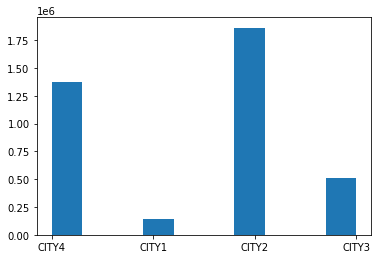

In [44]:
#plotting histogram

plt.hist(df_final["City"], bins=10)
plt.show()

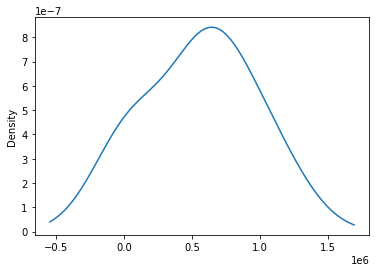

In [45]:
#plotting as per the customer preferred delivery day

df_final['PreferredDeliveryDay'].value_counts().plot(kind = 'kde')
plt.show()

In [46]:
corr = df_final.corr()

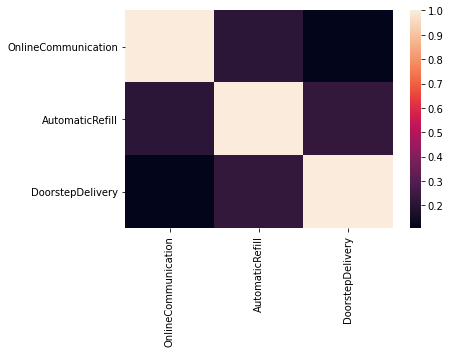

In [47]:
#plotting a heatmap

sns.heatmap(corr)
plt.show()

In [48]:
#decribing the data

df_final.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,3.883469e+06,3.883469e+06,3.883469e+06
mean,5.663995e-01,2.014161e-01,1.091537e-01
std,4.955716e-01,4.010582e-01,3.118320e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00


In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883469 entries, 0 to 3883468
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   RetentionPotential    object
 1   City                  object
 2   OnlineCommunication   int64 
 3   AutomaticRefill       int64 
 4   DoorstepDelivery      int64 
 5   PreferredDeliveryDay  object
 6   EmailType             object
 7   MailOpened            object
 8   MailClicked           object
dtypes: int64(3), object(6)
memory usage: 296.3+ MB


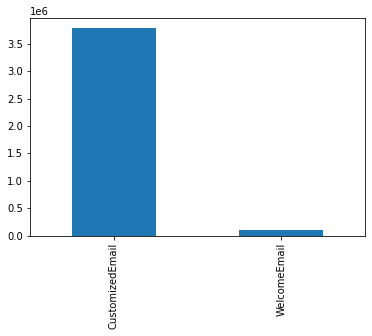

In [50]:
#plot between customized and welcome emails

df_final['EmailType'].value_counts().plot(kind = 'bar')
plt.show()

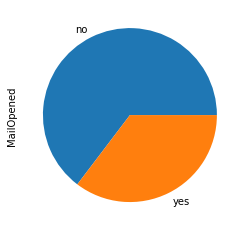

In [51]:
#pie chart showing the mail is opened or not

df_final['MailOpened'].value_counts().plot(kind = 'pie')
plt.show()

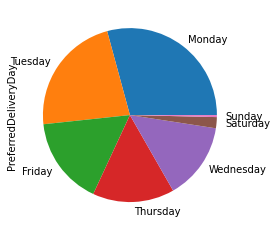

In [52]:
#pie chart differentiating the weekadays for delivery as per preferance

df_final['PreferredDeliveryDay'].value_counts().plot(kind = 'pie')
plt.show()

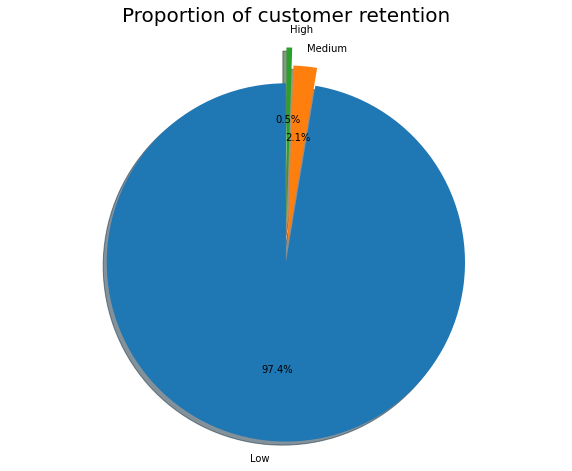

In [53]:
labels = 'Low', 'Medium', 'High'
low_count = df_final.RetentionPotential[df_final['RetentionPotential']=='Low'].count()
med_count = df_final.RetentionPotential[df_final['RetentionPotential']=='Medium'].count()
high_count = df_final.RetentionPotential[df_final['RetentionPotential']=='High'].count()
sizes = [low_count, med_count, high_count]
explode = (0, 0.1, 0.2)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer retention", size = 20)
plt.show()

In [54]:
df_final.head()

,RetentionPotential,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
1,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
2,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
3,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable
4,Low,CITY4,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
# encoding categorical variables

label_encoder = LabelEncoder()

df_final['RetentionPotential']= label_encoder.fit_transform(df_final['RetentionPotential'])
df_final['City']= label_encoder.fit_transform(df_final['City'])
df_final['PreferredDeliveryDay']= label_encoder.fit_transform(df_final['PreferredDeliveryDay'])
df_final['EmailType']= label_encoder.fit_transform(df_final['EmailType'])
df_final['MailOpened']= label_encoder.fit_transform(df_final['MailOpened'])
df_final['MailClicked']= label_encoder.fit_transform(df_final['MailClicked'])
df_final['City']= label_encoder.fit_transform(df_final['City'])
df_final['PreferredDeliveryDay']= label_encoder.fit_transform(df_final['PreferredDeliveryDay'])

In [57]:
df_final.head()

,RetentionPotential,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,1,3,0,0,0,4,1,1,0
1,1,3,0,0,0,4,1,1,0
2,1,3,0,0,0,4,1,1,0
3,1,3,0,0,0,4,1,1,0
4,1,3,0,0,0,4,1,1,0


In [58]:
test_df_final.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity
0,CITY1,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,52
1,CITY1,1,0,0,Friday,CustomizedEmail,yes,no,52
2,CITY1,1,0,0,Friday,CustomizedEmail,no,no,52
3,CITY1,1,0,0,Friday,CustomizedEmail,no,no,52
4,CITY1,1,0,0,Friday,CustomizedEmail,no,no,52


In [59]:
test_df_final.drop("OrderQuantity", axis = 1, inplace=True)

In [60]:
# encoding categorical variables

label_encoder1 = LabelEncoder()

test_df_final['City']= label_encoder1.fit_transform(test_df_final['City'])
test_df_final['PreferredDeliveryDay']= label_encoder1.fit_transform(test_df_final['PreferredDeliveryDay'])
test_df_final['EmailType']= label_encoder1.fit_transform(test_df_final['EmailType'])
test_df_final['MailOpened']= label_encoder1.fit_transform(test_df_final['MailOpened'])
test_df_final['MailClicked']= label_encoder1.fit_transform(test_df_final['MailClicked'])


In [61]:
test_df_final.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,0,1,0,0,0,1,1,0
1,0,1,0,0,0,0,1,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [62]:
df_final.head()

,RetentionPotential,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,1,3,0,0,0,4,1,1,0
1,1,3,0,0,0,4,1,1,0
2,1,3,0,0,0,4,1,1,0
3,1,3,0,0,0,4,1,1,0
4,1,3,0,0,0,4,1,1,0


In [63]:
#df_final.drop(["City",	"OnlineCommunication",	"AutomaticRefill",	"DoorstepDelivery",	"PreferredDeliveryDay"], axis = 1, inplace=True)


In [64]:
train_x = df_final.drop("RetentionPotential", axis=1)

In [65]:
train_y = df_final["RetentionPotential"]

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [67]:
param_grid = {'bootstrap': [True], 'max_depth': [3, 5], 
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10]}

In [68]:
rfr = RandomForestClassifier(random_state = 0)

In [69]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3,
                        n_jobs = 1, verbose = 0, return_train_score=True)

In [70]:
g_search.fit(train_x, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [71]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 5}


In [72]:
rf = RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=5, bootstrap=True)

In [73]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
test_df_final.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked
0,0,1,0,0,0,1,1,0
1,0,1,0,0,0,0,1,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [75]:
test_df_final.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'EmailType', 'MailOpened', 'MailClicked'],
      dtype='object')

In [76]:
df_final.columns

Index(['RetentionPotential', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'EmailType', 'MailOpened',
       'MailClicked'],
      dtype='object')

In [77]:
pred = rf.predict(test_df_final)

In [78]:
train_y.shape, pred.shape

((3883469,), (1013740,))

In [79]:
train_y = train_y[:5955]
pred = pred[:5955]

In [80]:
train_y.shape, pred.shape

((5955,), (5955,))

In [81]:
train_y = train_y.to_numpy().reshape(-1, 1)

pred = pred.reshape(-1, 1)

In [82]:
train_y.shape, pred.shape

((5955, 1), (5955, 1))

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(train_y, pred)

0.9929471032745592

In [85]:
pred.shape

(5955, 1)

In [86]:
#converting the 2D numpy array to the flattened list

import itertools

pred_list = pred
pred_list_final = list(itertools.chain.from_iterable(pred_list))

In [87]:
type(pred_list_final)

list

In [88]:
cust_id.head()

0    C37869
1    C37869
2    C37869
3    C37869
4    C37869
Name: CustomerID, dtype: object

In [89]:
cust_id.values

array(['C37869', 'C37869', 'C37869', ..., 'C26055', 'C26055', 'C25058'],
      dtype=object)

In [90]:
cust_id = cust_id[:5955]
cust_id_list = list(cust_id.values)


In [91]:
len(cust_id_list)

5955

In [92]:
len(pred_list_final)

5955

In [93]:
df = pd.DataFrame(list(zip(cust_id_list, pred_list_final)),
               columns =['CustomerID', 'RetentionPotential'])

In [94]:
df.to_csv('Murarkar_Harsh_RPL_FinalHack.csv', index=False)